# Grammar Extraction

### A. Get Raw Rules (non-Chomsky-Normal-Form)

**Source: NLTK's WSJ TreeBank**

** a. What does the TreeBank look like **

In [3]:
from nltk.corpus import treebank

In [4]:
fileids = treebank.fileids()
print "File Size of WSJ TreeBank: ", len(fileids)
print "Sample Filenames: ", fileids[:5]

File Size of WSJ TreeBank:  199
Sample Filenames:  [u'wsj_0001.mrg', u'wsj_0002.mrg', u'wsj_0003.mrg', u'wsj_0004.mrg', u'wsj_0005.mrg']


In [5]:
print "What's in a Single File: "
print 
print "Words: "
print treebank.words('wsj_0001.mrg')
print "Tagged Words: "
print treebank.tagged_words('wsj_0001.mrg')
print "Parsed Sentence in Tree"
print treebank.parsed_sents('wsj_0001.mrg')[0]

What's in a Single File: 

Words: 
[u'Pierre', u'Vinken', u',', u'61', u'years', u'old', ...]
Tagged Words: 
[(u'Pierre', u'NNP'), (u'Vinken', u'NNP'), ...]
Parsed Sentence in Tree
(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


** b. Rule Extraction **

In [9]:
import nltk
from itertools import chain

In [15]:
class ExtractWSJ:
    
    def __init__(self):
        return
    
    def extract_grammar(self):
        from nltk.corpus import treebank
        fileids = treebank.fileids()
        trees = [treebank.parsed_sents(fileid) for fileid in fileids]
        trees = list(chain.from_iterable(trees))
        rules = [tree.productions() for tree in trees]
        rules = list(set(chain.from_iterable(rules)))
        return rules
    
    def rule_to_str(self, rule): # rule: nltk.grammar.Production, => [LHS,[rhs,..]] format.
        rule = str(rule)
        lhs = rule.split(' -> ')[0]
        rhs = rule.split(' -> ')[1].split(' ')
        return [lhs, rhs]

    def str_to_rule(self, rule_str): # rule_str: [LHS,[rhs,..]], => rule: nltk.grammar.Production.
        return nltk.grammar.Production(nltk.grammar.Nonterminal(rule_str[0]),rule_str[1])
    
    def rule_form(self, rule): # handles both rule & rule_str.
        if type(rule)==nltk.grammar.Production:
            rule = str(rule)
            lhs = rule.split(' -> ')[0]
            rhs = rule.split(' -> ')[1].split(' ')
        else:
            lhs, rhs = rule[0], rule[1]
        rule_form = 'X->'
        for item in rhs:
            rule_form += 'x' if item.startswith("'") else 'X'
        return rule_form

    def format_summary(self, rules): 
        # print rule types in the form of, e.g., X->XXxxX, 
        #  X represents a nonterminal, x terminal.
        return list(set(map(self.rule_form, rules)))    

In [16]:
tb = ExtractWSJ()

In [17]:
rules = tb.extract_grammar()

In [18]:
print "Summary: "
print "Number of Rules: ", len(rules)
print "Sample Rules: "
for rule in rules[:10]:
    print rule

Summary: 
Number of Rules:  21763
Sample Rules: 
VBZ -> 'cites'
VBD -> 'spurned'
PRN -> , ADVP-TMP ,
NNP -> 'ACCOUNT'
JJ -> '36-day'
NP-SBJ-2 -> NN
JJ -> 'unpublished'
NP-SBJ-1 -> NNP
JJ -> 'elusive'
NNS -> 'Lids'


In [20]:
print tb.format_summary(rules)

['X->XXXXXx', 'X->XXXxXX', 'X->XxXX', 'X->XXXXXXXXX', 'X->XXXxXXX', 'X->XXXXXXXXXXXXX', 'X->XXXXXXXXXXXX', 'X->x', 'X->XXXXx', 'X->XXXxXXXXXX', 'X->XXXXXXXx', 'X->XX', 'X->XXXxXXXX', 'X->XXXXXX', 'X->XXxX', 'X->XXXXXXXXx', 'X->XXXxxXX', 'X->XXxXXXXXx', 'X->X', 'X->XxXXX', 'X->XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', 'X->XXXXX', 'X->XXXXXXXXXX', 'X->XxX', 'X->XXXXXXXXXXXXXXXXXXXX', 'X->XXXXXxX', 'X->XXXxXXXXXx', 'X->XXXXXXXX', 'X->XXXXXXXXXXX', 'X->XXXXxX', 'X->XXXx', 'X->XXXXXXx', 'X->XXXXXXXXXXXXXXXXXX', 'X->XXXXXXXXXXXXXXX', 'X->XXxXX', 'X->XXX', 'X->XXXXxXXX', 'X->XXXxXXXXXXX', 'X->XXXXxx', 'X->XXxXXX', 'X->XXXX', 'X->XXXXXXX', 'X->XXXxXXXXX', 'X->XXXxx', 'X->XXXxX', 'X->XXx', 'X->xXXX', 'X->XXxXXXx', 'X->XXXXXXXXXx', 'X->XXXxxXXX', 'X->XXXxXXXXXXx']


In [21]:
sample_rule = rules[0]
print "Rule in nltk.grammar.Production Format: "
print sample_rule
print "Rule in String Format: "
sample_rule_str = tb.rule_to_str(sample_rule)
print sample_rule_str

Rule in nltk.grammar.Production Format: 
VBZ -> 'cites'
Rule in String Format: 
['VBZ', ["'cites'"]]


### B. Convert Rules to Chomsky Norm Form (CNF)

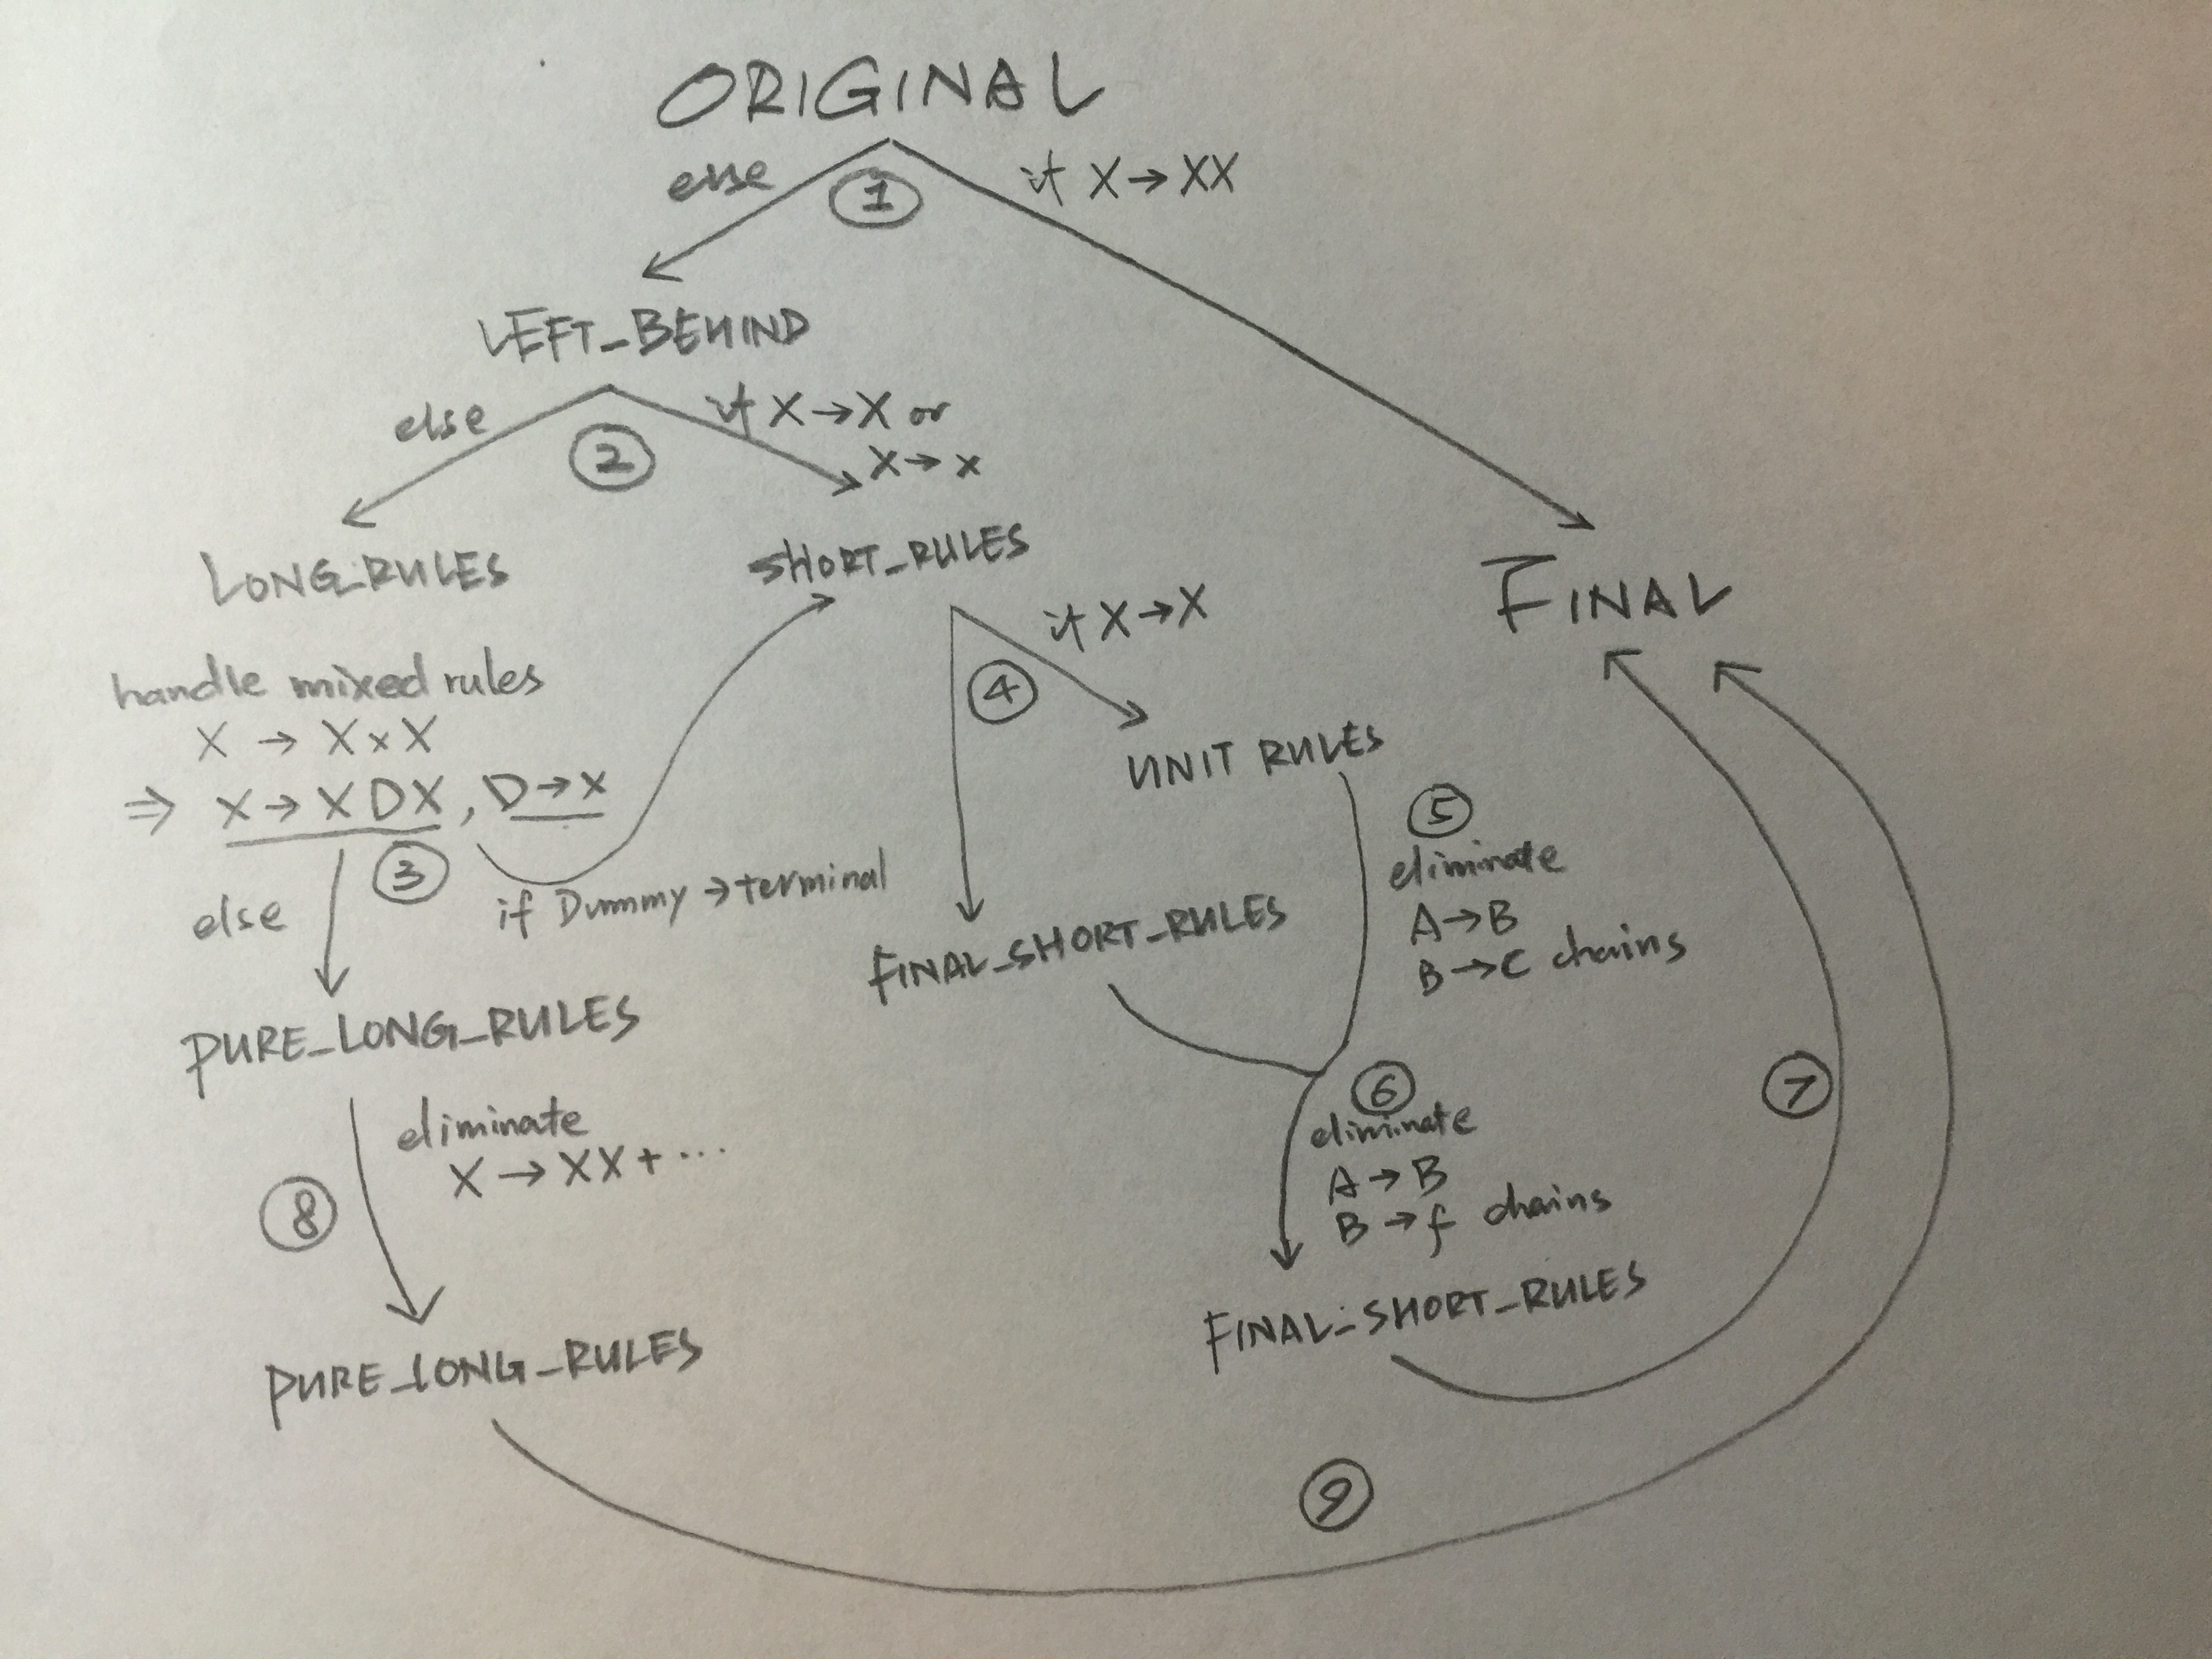

Conversion Pipeline


In [26]:
from IPython.display import display, Image
display(Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/NLP/FIGS/chomsky_norm_form_conversion_pipeline.png',width='50%'))
print "Conversion Pipeline"

In [37]:
# CONVERT RULES FIRST TO [LHS,[rhs,..]] FORMAT
rules = tb.extract_grammar()
rule_strs = [tb.rule_to_str(rule) for rule in rules]

In [38]:
# FUNCTION FOR GENERATING DUMMY NONTERMINALS
def seq_gen(index_str='X',start=0):
    i = start
    while True:
        yield index_str+str(i)
        i += 1

In [39]:
def to_cnf(rule_strs): # makes use of ExtractWSJ.
    
    len_pre_conv = len(rule_strs)
    
    # step 1: original -> left_behind, final.
    final, left_behind = [], []
    for rule_str in rule_strs:
        if tb.rule_form(rule_str)=='X->XX':
            final.append(rule_str)
        else:
            left_behind.append(rule_str)
    
    # step 2: left_behind -> long_rules, short_rules.
    long_rules, short_rules = [], []
    for rule_str in left_behind:
        if len(rule_str[1]) > 1:
            long_rules.append(rule_str)
        else:
            short_rules.append(rule_str)
    
    # step 3: long_rules -> pure_long_rules, (send some rules to short_rules).
    gen = seq_gen('X',0)
    pure_long_rules = []
    for rule_str in long_rules:
        lhs, rhs = rule_str
        new_rhs = []
        new_rule_strs = []
        for item in rhs:
            if item.startswith("'"): # i.e. a terminal.
                new_lhs = gen.next()
                new_rule_strs.append([new_lhs,[item]])
                new_rhs.append(new_lhs)
            else:
                new_rhs.append(item)
        pure_long_rules.append([lhs,new_rhs])
        short_rules += new_rule_strs   
    
    # step 4: short_rules -> final_short_rules, unit_rules
    unit_rules, final_short_rules = [], []
    for rule_str in short_rules:
        if tb.rule_form(rule_str)=='X->X':
            unit_rules.append(rule_str)
        else:
            final_short_rules.append(rule_str)   
    
    # step 5: in short_rules, eliminate [A->B, B->C] chains.
    while True: # A->B, B->C => A->C until no such cases found.
        num_conv = 0
        new_unit_rules = []
        for rule_str_i in unit_rules:
            for rule_str_j in unit_rules:
                if rule_str_i==rule_str_j: continue
                lhs_i, rhs_i = rule_str_i
                lhs_j, rhs_j = rule_str_j
                if lhs_j==rhs_i[0]:
                    new_unit_rules.append([lhs_i,rhs_j])
                    num_conv += 1
        if num_conv==0: break
        unit_rules = new_unit_rules   
    
    # step 6: with short_rules, final_short_rules, eliminate [A->B, B->f] chains.
    tmp_final_short_rules = []
    for rule_str_i in final_short_rules:
        lhs_i, rhs_i = rule_str_i
        for rule_str_j in unit_rules:
            lhs_j, rhs_j = rule_str_j
            if lhs_i==rhs_j[0]: # A->B, B->c situation.
                tmp_final_short_rules.append([lhs_j,rhs_i])
        tmp_final_short_rules.append([lhs_i,rhs_i])
    final_short_rules = tmp_final_short_rules   
    
    # step 7: merge final_short_rules from step 6 to final.
    final += final_short_rules
    
    # step 8, 9: in pure_long_rules, eliminate X->XX+.., append results to final.
    gen = seq_gen('Y',0) # so that indices won't get tooooo long.
    while True:
        tmp_pure_long_rules = []
        if len(pure_long_rules)==0: break
        for rule_str in pure_long_rules:
            lhs, rhs = rule_str
            if len(rhs)>2:
                new_nonterm = gen.next()
                final.append([new_nonterm, rhs[:2]])
                new_rhs = [new_nonterm] + rhs[2:]
                tmp_pure_long_rules.append([lhs,new_rhs])
            else:
                final.append(rule_str)
        pure_long_rules = tmp_pure_long_rules 
    
    len_post_conv = len(final)
    
    print "Summary"
    print "Pre-Conversion Rule Set Size: ", len_pre_conv
    print "Post-Conversion Rule set Size: ", len_post_conv
    print "Resulting Rule Formats: ", tb.format_summary(final)
    return final

In [40]:
%%time
cnf_rules = to_cnf(rule_strs) 
    # not surprisingly, the conversion leads to massive flattening of rules.
    # cf. J&M ch13.4: 12-3.

Summary
Pre-Conversion Rule Set Size:  21763
Post-Conversion Rule set Size:  155801
Resulting Rule Formats:  ['X->XX', 'X->x']
CPU times: user 1.36 s, sys: 12.5 ms, total: 1.37 s
Wall time: 1.37 s


**NB: ** If needed, use tb.str_to_rule to convert the result into nltk.grammar.Production format.

# CKY Algorithm

### A. CKY Recognizer

** a. Algorithm ** (cf. J&M ch13.4:14,fig.13.10, modified for indexing reason)

$ \quad \textbf{for } j \leftarrow 1 \textbf{ to } len(words) \textbf{ do}  $

$ \quad \quad table[j-1,j] \leftarrow \{A|A\rightarrow words[j-1], G\} $

$ \quad \quad \textbf{for } i \leftarrow j-2 \textbf{ to } 0 \textbf{ do} $

$ \quad \quad \quad \textbf{for } k \leftarrow i+1 \textbf{ to } j-1 \textbf{ do} $

$ \quad \quad \quad \quad table[i,j] \leftarrow table[i,j] \cup \{A|A\rightarrow BC\in G, B\in table[i,k], C\in table[k,j]\} $


** b. Code **

In [1]:
import numpy as np
import pandas as pd
from operator import itemgetter
from collections import defaultdict

##### Toy Grammar (cf. Erk 2016, Computational Semantics, CKY Parsing)

In [2]:
toy_grammar = [['S',['NP','VP1']],
               ['S',['NP','VP2']],
               ['VP1',["'ate'"]],
               ['VP1',['V','NP']],
               ['VP2',['VP1','PP']],
               ['NP',['Det','N']],
               ['NP',['Det','N1']],
               ['NP',["'I'"]],
               ['NP',["'chopsticks'"]],
               ['N1',['N','PP']],
               ['PP',['P','NP']],
               ['V',["'ate'"]],
               ['N',["'spaghetti'"]],
               ['N',["'chopsticks'"]],
               ['Det',["'the'"]],
               ['P',["'with'"]] ] 

words = ["'I'","'ate'","'the'","'spaghetti'","'with'","'chopsticks'"]

In [13]:
class CKY:
    
    def __init__(self, grammar):
        # grammar: a list of rule_str (format: [LHS,[rhs,..]])
        self.G = grammar
    
    def realizers(self, words):
        # takes a sentence as a list of words,
        #  returns all lhs of rules in G wher rhs = one of the words.
        lhs = []
        for word in words:
            lhs.extend(map(itemgetter(0), filter(lambda r: r[1]==[word], self.G)))
        return lhs   

    def combs(self, l1, l2): 
        # takes two lists of (non)terminals and a grammar G,
        #  return all possible combinations {A|A->BC in G, B in l1, C in l2}.
        lhs = []
        for rhs_1 in l1:
            for rhs_2 in l2:
                lhs.extend(map(itemgetter(0), filter(lambda r: r[1]==[rhs_1,rhs_2], self.G)))
        return lhs    

    def recognize(self, words):
        table = defaultdict(list)
        for j in xrange(1,len(words)+1): # 1 to len(sent)
            table[(j-1,j)] = self.realizers([words[j-1]]) # words indexed from 0.
            for i in reversed(xrange(0,j-1)): # j-2 to 0 
                for k in xrange(i+1,j): # i+1 to j-1
                    table[(i,j)] += self.combs(table[(i,k)],table[(k,j)])
        chart = pd.DataFrame(np.zeros((len(words),len(words))),
                             columns=pd.indexes.range.RangeIndex(1,7),dtype=list)
        for key,value in table.iteritems():
            chart.ix[key] = value
        chart.columns = words # do this after filling in the value to avoid indexing error.
        return table, chart 

# NB: realizer and combs can surely be integrated into a single function,
#     but for demonstration purpose, i leave them separate, for more explicity.

In [14]:
recognizer = CKY(toy_grammar)

In [15]:
words = ["'I'","'ate'","'the'","'spaghetti'","'with'","'chopsticks'"]
    # expected: all realizers = {NP, VP1, V, Det, N, P, NP, N}
recognizer.realizers(words)

['NP', 'VP1', 'V', 'Det', 'N', 'P', 'NP', 'N']

In [16]:
l1 = ['Det','P','NP']
l2 = ['N','N1','NP','VP1','VP2']
    # expected: all combs = {NP, NP, PP, S, S}
recognizer.combs(l1, l2)

['NP', 'NP', 'PP', 'S', 'S']

In [17]:
words = ["'I'","'ate'","'the'","'spaghetti'","'with'","'chopsticks'"]
table, chart = recognizer.recognize(words)

In [18]:
table

defaultdict(list,
            {(0, 1): ['NP'],
             (0, 2): ['S'],
             (0, 3): [],
             (0, 4): ['S'],
             (0, 5): [],
             (0, 6): ['S', 'S'],
             (1, 2): ['VP1', 'V'],
             (1, 3): [],
             (1, 4): ['VP1'],
             (1, 5): [],
             (1, 6): ['VP1', 'VP2'],
             (2, 3): ['Det'],
             (2, 4): ['NP'],
             (2, 5): [],
             (2, 6): ['NP'],
             (3, 4): ['N'],
             (3, 5): [],
             (3, 6): ['N1'],
             (4, 5): ['P'],
             (4, 6): ['PP'],
             (5, 6): ['NP', 'N']})

In [19]:
chart

,'I','ate','the','spaghetti','with','chopsticks'
0,[NP],[S],[],[S],[],"[S, S]"
1,0,"[VP1, V]",[],[VP1],[],"[VP1, VP2]"
2,0,0,[Det],[NP],[],[NP]
3,0,0,0,[N],[],[N1]
4,0,0,0,0,[P],[PP]
5,0,0,0,0,0,"[NP, N]"


### B. CKY Parser

In [81]:
import random
import numpy as np
import pandas as pd
from operator import itemgetter
from collections import defaultdict

In [71]:
class CKY:
    
    def __init__(self, grammar):
        self.G = grammar
        
    def make_node(self, node_type, node, node_coords,
                                   left_node=None, right_node=None, word=None):
        if node_type=='NT':
            return {'type':node_type, 'node':node,  'node_coords':node_coords,
                                      'left':left_node['node'],  'left_coords':left_node['node_coords'],
                                      'right':right_node['node'],'right_coords':right_node['node_coords']}
        return {'type':node_type, 'node':node, 'node_coords':node_coords, 'word':word}
    
    def realizers(self, word, cur_coords): # G: toy_grammar
        # given a word (i.e. terminal), current_coords and a grammar G,
        #  return all lhs nodes of rules where rhs = word.
        # different from the version in recognizer, we cannot process all words at once,
        #  because we need to keep track of coordinates.
        lhs_nodes = []
        rule_list = filter(lambda r: r[1]==[word], self.G)
        for rule_str in rule_list:
            lhs_nodes.append(self.make_node('T',rule_str[0],cur_coords,word=rule_str[1][0])) 
                # rule_str[0] retrieves lhs.
                # rule_str[1][0] retries word corresponding in the terminal node.
        return lhs_nodes  
    
    def combs(self, l1, l2, cur_coords): 
        # given two lists of (non)terminal nodes, current coordinates and a grammar G,
        #  return all possible combination nodes {A|A->BC in G, B in l1, C in l2}.
        lhs_nodes = []
        for left_node in l1:
            for right_node in l2:
                rule_list = filter(lambda r: r[1]==[left_node['node'],right_node['node']], self.G)
                for rule_str in rule_list:
                    lhs_nodes.append(self.make_node('NT',rule_str[0],cur_coords,left_node,right_node))
        return lhs_nodes
    
    def pretty_print(self, node):
        if node['type']=='NT':
            return node['node']+'['+str(node['left_coords'])+','+str(node['right_coords'])+']'
        return node['node']
    
    def cky_parse(self, words):
        table = defaultdict(list)
        for j in xrange(1,len(words)+1): # 1 to len(sent)
            table[(j-1,j)] = self.realizers(words[j-1],(j-1,j)) # words indexed from 0.
            for i in reversed(xrange(0,j-1)): # j-2 to 0 
                for k in xrange(i+1,j): # i+1 to j-1
                    table[(i,j)] += self.combs(table[(i,k)],table[(k,j)],(i,j))
        chart = pd.DataFrame(np.zeros((len(words),len(words))),
                             columns=pd.indexes.range.RangeIndex(1,len(words)+1),dtype=list)
        for key,value in table.iteritems():
            chart.ix[key] = map(self.pretty_print,value)
        chart.columns = words # do this after filling in the value to avoid indexing error.
        return table, chart  

    def get_tree(self, words, table): 
        # given a sentence as a list of words, and a cky-table
        #  randomly return a parse tree.
        n = len(words)
        roots = filter(lambda nd:nd['node']=='S', table[(0,n)])
        if roots==[]: 
            print "The sentence doesn't have a possible parsing with this grammar."
            return
        S = random.choice(roots)
        def get_node(coords):
            return random.choice(table[coords])
        def get_branches(node):
            if node['type']=='T':
                return (node['node'],node['word'])
            left = get_branches(get_node(node['left_coords']))
            right = get_branches(get_node(node['right_coords']))
            return (node['node'], (left), (right))
        tree = get_branches(S)
        return tree

# NB: i don't retrieve all the possible parse trees here, because of the following reasons:
#  a. this incurs great computational cost.
#  b. we'll build a parser that retrieves only the best tree anyway.

In [72]:
parser = CKY(toy_grammar)

In [73]:
left_node = {'type':'NT','node':'NP','node_coords':(0,1)}
right_node = {'type':'NT','node':'VP1','node_coords':(1,2)}
print "Make Terminal Node"
print parser.make_node('T','NP',(0,1))
print "Make Nonterminal Node"
print parser.make_node('NT','S',(0,2),left_node,right_node)

Make Terminal Node
{'node': 'NP', 'word': None, 'node_coords': (0, 1), 'type': 'T'}
Make Nonterminal Node
{'node': 'S', 'right': 'VP1', 'node_coords': (0, 2), 'right_coords': (1, 2), 'left_coords': (0, 1), 'type': 'NT', 'left': 'NP'}


In [74]:
words = ["'I'","'ate'","'the'","'spaghetti'","'with'","'chopsticks'"]
for i,word in enumerate(words):
    print parser.realizers(word, (i,i+1))

[{'node': 'NP', 'word': "'I'", 'node_coords': (0, 1), 'type': 'T'}]
[{'node': 'VP1', 'word': "'ate'", 'node_coords': (1, 2), 'type': 'T'}, {'node': 'V', 'word': "'ate'", 'node_coords': (1, 2), 'type': 'T'}]
[{'node': 'Det', 'word': "'the'", 'node_coords': (2, 3), 'type': 'T'}]
[{'node': 'N', 'word': "'spaghetti'", 'node_coords': (3, 4), 'type': 'T'}]
[{'node': 'P', 'word': "'with'", 'node_coords': (4, 5), 'type': 'T'}]
[{'node': 'NP', 'word': "'chopsticks'", 'node_coords': (5, 6), 'type': 'T'}, {'node': 'N', 'word': "'chopsticks'", 'node_coords': (5, 6), 'type': 'T'}]


In [75]:
l1 = [{'type': 'T', 'node': 'NP', 'node_coords': (0, 1)}]
l2 = [{'type':'NT', 'node':'VP1', 'node_coords':(1,6), 
                    'left':'V', 'left_coords':(1,2), 'right':'NP', 'right_coords':(2,6)},
      {'type':'NT', 'node':'VP2', 'node_coords':(1,6), 
                    'left':'VP1', 'left_coords':(1,4), 'right':'PP', 'right_coords':(4,6)}]
cur_coords = (0,6)
parser.combs(l1, l2, cur_coords)

[{'left': 'NP',
  'left_coords': (0, 1),
  'node': 'S',
  'node_coords': (0, 6),
  'right': 'VP1',
  'right_coords': (1, 6),
  'type': 'NT'},
 {'left': 'NP',
  'left_coords': (0, 1),
  'node': 'S',
  'node_coords': (0, 6),
  'right': 'VP2',
  'right_coords': (1, 6),
  'type': 'NT'}]

In [76]:
t_node = {'node': 'NP', 'node_coords': (0, 1), 'type': 'T'}
nt_node = {'type':'NT', 'node':'S', 'node_coords':(0,6), 
                        'left':'NP', 'left_coords':(0,1), 'right':'VP1', 'right_coords':(1,6)}
print parser.pretty_print(t_node)
print parser.pretty_print(nt_node)

NP
S[(0, 1),(1, 6)]


In [77]:
words = ["'I'","'ate'","'the'","'spaghetti'","'with'","'chopsticks'"]
table, chart = parser.cky_parse(words)

In [78]:
table

defaultdict(list,
            {(0,
              1): [{'node': 'NP',
               'node_coords': (0, 1),
               'type': 'T',
               'word': "'I'"}],
             (0,
              2): [{'left': 'NP',
               'left_coords': (0, 1),
               'node': 'S',
               'node_coords': (0, 2),
               'right': 'VP1',
               'right_coords': (1, 2),
               'type': 'NT'}],
             (0, 3): [],
             (0,
              4): [{'left': 'NP',
               'left_coords': (0, 1),
               'node': 'S',
               'node_coords': (0, 4),
               'right': 'VP1',
               'right_coords': (1, 4),
               'type': 'NT'}],
             (0, 5): [],
             (0,
              6): [{'left': 'NP',
               'left_coords': (0, 1),
               'node': 'S',
               'node_coords': (0, 6),
               'right': 'VP1',
               'right_coords': (1, 6),
               'type': 'NT'}, {'left': 'NP',
 

In [79]:
chart

,'I','ate','the','spaghetti','with','chopsticks'
0,[NP],"[S[(0, 1),(1, 2)]]",[],"[S[(0, 1),(1, 4)]]",[],"[S[(0, 1),(1, 6)], S[(0, 1),(1, 6)]]"
1,0,"[VP1, V]",[],"[VP1[(1, 2),(2, 4)]]",[],"[VP1[(1, 2),(2, 6)], VP2[(1, 4),(4, 6)]]"
2,0,0,[Det],"[NP[(2, 3),(3, 4)]]",[],"[NP[(2, 3),(3, 6)]]"
3,0,0,0,[N],[],"[N1[(3, 4),(4, 6)]]"
4,0,0,0,0,[P],"[PP[(4, 5),(5, 6)]]"
5,0,0,0,0,0,"[NP, N]"


In [88]:
parser.get_tree(words, table)

('S',
 ('NP', "'I'"),
 ('VP1',
  ('V', "'ate'"),
  ('NP',
   ('Det', "'the'"),
   ('N1',
    ('N', "'spaghetti'"),
    ('PP', ('P', "'with'"), ('NP', "'chopsticks'"))))))

# Earley Algorithm

**NB:** 

* Recognizer only, partly because this is the least interesting parser to me personally.
* I made some modification to the algorithm on J&M ch13.4:19,Fig.13.13 to make it more intuitive.
* If the code is not clear, it is still recommended to look at the original algorithm.

** a. Toy Grammar **

In [89]:
# TOY GRAMMAR, cf. J&M ch13.4:21,Fig.13.14, with left-recursion fixed.
toy_grammar2 = [['S',['NP','VP']],
                ['S',['Aux','NP','VP']],
                ['S',['VP']],
                ['NP',['Pro']],
                ['NP',['Prop']],
                ['NP',['Det','Noun']],
                ['VP',['Verb']],
                ['VP',['Verb','NP']],
                ['VP',['Verb','NP','PP']],
                ['VP',['Verb','PP']],
                ['PP',['Prep','NP']],
                ['Verb',["'book'"]],
                ['Det',["'that'"]],
                ['Noun',["'flight'"]],
                ['Pro',["'I'"]],
                ['Prop',["'Jim'"]],
                ['Prep',["'with'"]],
                ['Aux',["'do'"]]]

In [127]:
def is_part_of_speech(symbol):
    return symbol in ['Verb','Det','Noun','Pro','Prop','Prep','Aux']

** b. State & Chart Objects **

In [90]:
class State:
    
    def __init__(self, lhs, rhs, position): 
        # rhs is a list, position is a 2-tuple.
        self.lhs, self.rhs, self.position = lhs, rhs, position
        self.dot = rhs.index('@')
    
    def right_to_dot(self):
        if self.dot < len(self.rhs)-1:
            return self.rhs[self.dot+1]
        else:
            print "Dot is at the right edge!"
            return
    
    def advance_dot(self):
        self.rhs[self.dot]=self.right_to_dot()
        self.rhs[self.dot+1]='@'
        self.dot += 1
    
    def is_incomplete(self):
        return self.rhs[-1]!='@'
    
    def print_state(self):
        print '[', self.lhs, '->', self.rhs, ',', self.position, ']'
        

In [92]:
s0 = State('gamma',['@','S'],(0,0))
s1 = State('S',['VP','@'],(0,3))
s0.print_state()
s1.print_state()
print s0.is_incomplete()
print s1.is_incomplete()

[ gamma -> ['@', 'S'] , (0, 0) ]
[ S -> ['VP', '@'] , (0, 3) ]
True
False


In [93]:
s0.right_to_dot()

'S'

In [94]:
s2 = State('A',['alpha','@','B','beta'], (0,0))
s2.advance_dot()
s2.print_state()

[ A -> ['alpha', 'B', '@', 'beta'] , (0, 0) ]


In [100]:
from collections import defaultdict, deque

In [95]:
class Chart:
    
    def __init__(self):
        self.new = deque()
        self.processed = deque()
    
    def is_all_processed(self):
        return len(self.new)==0
    
    def get_state(self):
        state = self.new.pop()
        self.processed.appendleft(state)
        return state
    
    def print_states(self):
        print "Unprocessed:"
        for state in self.new:
            state.print_state()
        print "Processed:"
        for state in self.processed:
            state.print_state()
        

** c. Earley Recognizer **

In [136]:
from copy import deepcopy

In [141]:
class Earley:
    
    def __init__(self, grammar):
        self.G = grammar
        
    def add_to_chart(self, state, chart):
        if all((state.lhs,state.rhs,state.position)!=(st.lhs,st.rhs,st.position) 
               for st in chart.new):
            chart.new.appendleft(state)    
    
    def predictor(self, state):
        rtd = state.right_to_dot()
        i, j = state.position
        for rule_str in self.G:
            if rule_str[0]==rtd:
                self.add_to_chart(State(rtd,['@']+rule_str[1],(j,j)), self.C[j])    

    def scanner(self, state):
        rtd = state.right_to_dot()
        i, j = state.position
        for rule_str in self.G:
            if rule_str[0]==rtd and words[j]==rule_str[1][0] and is_part_of_speech(rtd):
                self.add_to_chart(State(rtd,[words[j]]+['@'],(j,j+1)), self.C[j+1])

    def completor(self, comp_state): 
        rtd = comp_state.lhs
        j, k = comp_state.position
        for state in self.C[j].processed:
            if state.is_incomplete() and state.position[1]==j and state.right_to_dot()==rtd:
                new_state = deepcopy(state)
                new_state.advance_dot()
                i, j = new_state.position
                new_state.position = (i,k)
                self.add_to_chart(new_state, self.C[k]) 

    def completion_found(self, len_words, i): # i: master chart's index
        return any(s.rhs[-1]=='@' and s.position==(0,len_words) 
                   for s in self.C[i].new)
    
    def return_complete(self, len_words, i):
        return filter(lambda s: s.rhs[-1]=='@' and s.position==(0,len_words), self.C[i].new)

    def recognize(self, words):
        
        self.C = defaultdict(Chart) # create & restart with new master chart.
        self.add_to_chart(State('gamma',['@','S'],(0,0)), self.C[0])

        L = len(words)
        for i in xrange(L):
            while not self.C[i].is_all_processed():
                state = self.C[i].get_state()
                if state.is_incomplete() and not is_part_of_speech(state.right_to_dot()):
                    self.predictor(state)
                elif state.is_incomplete() and is_part_of_speech(state.right_to_dot()):
                    self.scanner(state)
                else:
                    self.completor(state)
        
        while not self.completion_found(L, L): # fine final completion states.
            state = self.C[L].get_state()
            if not state.is_incomplete():
                self.completor(state)

        return self.return_complete(L, L)    


In [142]:
words = ["'book'", "'that'", "'flight'"]

In [143]:
ely = Earley(toy_grammar2)

In [144]:
complete_states = ely.recognize(words)

In [145]:
for state in complete_states: # only 1 complete state found.
    state.print_state()

[ VP -> ['Verb', 'NP', '@'] , (0, 3) ]
